<h1>Sports based intro to pandas, numpy, and matplotlib</h1>

This is an introduction to using pandas, numpy, and matplotlib/seaborn. Over the past couple months I've taken a deeper dive into the world of data science with a focus on programmatic based data wrangling and visualizations.
     
I chose to use a dataset that is used to generate visuals in the G.O.A.T dashboard on <href>www.lebronvsjordan.org</href>. The dataset is comprised of the top 5 teammates on either Jordan and Lebron's team for the first 14 seasons. <i>(15th season coming soon!)</i> 

Click here to download the csv file for this tutorial.

The goal of this dataset investigation is to see who had better teammates each season based on 3 different graphs: points per game (ppg), rebonds per game (rpg), and assists per game (apg).

<h3>Setup</h3>

In [25]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


csfont = {'fontname':'Dejavu Sans'}
titlefont = {'size': '14'}

<h3>Read in .csv files</h3>

<li>df or 'dataframe' is the common structure creaed in pandas and can be thought of as table</li>
<li>In this exercise we will create a dataframe called <b>dfTeam</b> that reads in a csv file of LeBron and Jordan's teammates</li>

In [5]:
dfTeam = pd.read_csv('L_vs_M_Teammates.csv')

<h3>Setup Cont.</h3>
<li><b>np.infinite</b> is used to clean the dataset of any rows that are blank and show NaN</li>
<li><b>dfTeam.columns</b> is a quick pandas command that shows all column names in a dataframe</li>
<li><b>dfTeam.shape</b> is a quick pandas command used to get the <b>rows x columns</b> in a dataset and <b>dfTeam.head()</b> shows the first 5 rows of data</li>

In [6]:
dfTeam = dfTeam[np.isfinite(dfTeam['season'])]

In [7]:
dfTeam.columns

Index(['teammate', 'years_season', 'season', 'm_or_l', 'position',
       'games_played_per_season', 'rpg_season', 'apg_season', 'spg_season',
       'bpg_season', 'turnovers_season', 'ppg_season', '3pt_attempts_per_game',
       '3pt_percentage_season', 'team_season', 'championship_season',
       'playoffs_reached', 'playoffs_team_lost_to_won',
       'eliminating_round_series', 'record', 'opponent_ppg', 'team_ppg'],
      dtype='object')

In [8]:
dfTeam.shape

(140, 22)

In [9]:
dfTeam.head()

,teammate,years_season,season,m_or_l,position,games_played_per_season,rpg_season,apg_season,spg_season,bpg_season,...,3pt_attempts_per_game,3pt_percentage_season,team_season,championship_season,playoffs_reached,playoffs_team_lost_to_won,eliminating_round_series,record,opponent_ppg,team_ppg
0,Carlos Boozer,2003-2004,1.0,LeBron,NaN,NaN,11.4,2.0,1.0,0.7,...,NaN,0.167,Cavaliers,No,Missed Playoffs,NaN,NaN,35-47,95.5,92.9
1,Zydrunas Ilgauskas,2003-2004,1.0,LeBron,NaN,NaN,8.1,1.3,0.5,2.5,...,NaN,0.286,Cavaliers,No,Missed Playoffs,NaN,NaN,35-47,95.5,92.9
2,Kevin Ollie,2003-2004,1.0,LeBron,NaN,NaN,2.1,2.9,0.6,0.1,...,NaN,0.444,Cavaliers,No,Missed Playoffs,NaN,NaN,35-47,95.5,92.9
3,Jeff McInnis,2003-2004,1.0,LeBron,NaN,NaN,2.6,7.5,1.2,0.1,...,NaN,0.388,Cavaliers,No,Missed Playoffs,NaN,NaN,35-47,95.5,92.9
4,Tony Battie,2003-2004,1.0,LeBron,NaN,NaN,4.8,0.7,0.4,0.9,...,NaN,0.125,Cavaliers,No,Missed Playoffs,NaN,NaN,35-47,95.5,92.9


<h3>Setup Cont.</h3>

<li><b>dfTeam.set_index</b> is used to change the current index of the dataframe from 0,1,2 etc. to each teammate's name</li>
<li><b>dfTeam.season.astype(int)</b> changes the column 'season' from type string to int</li>

In [10]:
dfTeam = dfTeam.set_index(['teammate'])

In [11]:
dfTeam['season'] = dfTeam.season.astype(int)

<h3>Creating groups within a dataframe</h3>

To tackle grouping this dataset, there are two different "groupings" that need to be created:
<li>Group 1: Split up each player into two main groups of either being LeBron or Jordan's teammate.</li>
<li>Group 2: Each Group 1 should then be broken up into 14 smaller groups that each represent a season.</li>
<li>In total there should be 28 groups. 14 for LeBron and 14 for Jordan.</li>

<h3>Grouping process for LeBron</h3>

In [12]:
group_l = dfTeam.groupby(['m_or_l']).get_group('LeBron')

In [13]:
group_l_season = group_l.groupby('season')

In [14]:
group_l_season.sum()

,games_played_per_season,rpg_season,apg_season,spg_season,bpg_season,turnovers_season,ppg_season,3pt_attempts_per_game,3pt_percentage_season,opponent_ppg,team_ppg
season,,,,,,,,,,,
1,0.0,29.0,14.4,3.7,4.3,3.7,52.1,0.0,1.410,477.5,464.5
2,0.0,26.6,12.4,3.9,3.9,4.7,53.0,0.0,1.099,478.5,482.5
3,0.0,28.6,5.1,3.0,3.2,3.7,46.9,0.0,1.034,477.0,488.0
4,0.0,30.7,7.9,4.2,3.2,5.2,51.7,0.0,0.851,464.5,484.0
5,0.0,29.3,7.9,3.1,2.9,4.8,49.0,0.0,0.857,483.5,482.0
6,0.0,24.4,10.7,4.1,2.5,5.3,58.0,0.0,1.631,457.0,501.5
7,0.0,25.1,10.3,3.4,3.1,7.4,52.2,0.0,1.043,478.0,510.5
8,0.0,24.2,7.7,3.1,3.9,5.7,52.8,0.0,6.446,473.0,510.5
9,0.0,25.1,11.9,5.6,3.2,8.4,60.7,0.0,1.281,462.5,492.5


<h3>Repeat grouping process for Jordan</h3>

In [15]:
group_m = dfTeam.groupby(['m_or_l']).get_group('Jordan')

In [16]:
group_m_season = group_m.groupby('season')

In [17]:
group_m_season.sum()

,games_played_per_season,rpg_season,apg_season,spg_season,bpg_season,turnovers_season,ppg_season,3pt_attempts_per_game,3pt_percentage_season,opponent_ppg,team_ppg
season,,,,,,,,,,,
1,0.0,25.6,8.1,3.2,2.5,8.7,63.5,0.0,0.233,0.0,0.0
2,0.0,22.8,15.0,4.2,1.6,9.9,66.0,0.0,0.796,0.0,0.0
3,0.0,31.0,15.8,3.7,2.8,9.2,52.3,0.0,0.938,0.0,0.0
4,0.0,30.2,11.8,3.7,2.9,7.9,46.0,0.0,0.882,0.0,0.0
5,0.0,24.3,13.5,4.8,2.3,8.7,56.1,0.0,1.027,0.0,0.0
6,0.0,27.3,15.4,5.8,3.6,9.0,60.2,0.0,0.609,0.0,0.0
7,0.0,24.8,17.4,5.7,2.2,7.5,43.2,0.0,1.414,0.0,0.0
8,0.0,23.3,17.0,4.6,3.2,7.0,59.1,0.0,1.275,0.0,0.0
9,0.0,23.8,16.2,5.0,2.9,6.9,53.0,0.0,1.153,0.0,0.0


<h3>Create graphs for ppg based on season groups</h3>

([<matplotlib.axis.XTick at 0x119a2b710>,
 <a list of 15 Text xticklabel objects>)

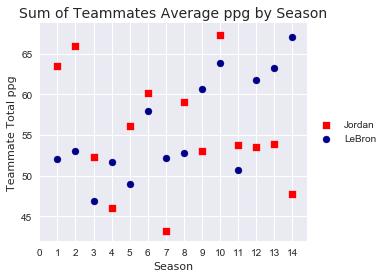

In [26]:
fig = plt.figure()
plot_area = fig.add_subplot(111)

plot_area.scatter(range(1,15), group_m_season.ppg_season.sum(), marker="s", label='Jordan', color='red')
plot_area.scatter(range(1,15), group_l_season.ppg_season.sum(), marker="o", label='LeBron', color='#00008b')

box = plot_area.get_position()
plot_area.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plot_area.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_area.set_title('Sum of Teammates Average ppg by Season', **csfont, **titlefont)
plot_area.set_xlabel('Season', **csfont)
plot_area.set_ylabel('Teammate Total ppg', **csfont)
plt.xticks(np.arange(0, 15, 1.0))

<h3>Create graphs for rpg based on season groups</h3>

([<matplotlib.axis.XTick at 0x119b09ef0>,
 <a list of 15 Text xticklabel objects>)

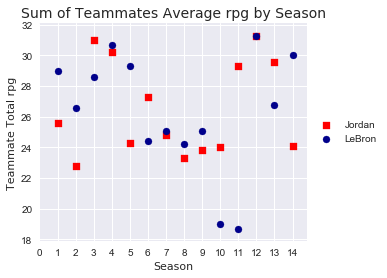

In [27]:
fig = plt.figure()
plot_area = fig.add_subplot(111)

plot_area.scatter(range(1,15), group_m_season.rpg_season.sum(), marker="s", label='Jordan', color='red')
plot_area.scatter(range(1,15), group_l_season.rpg_season.sum(), marker="o", label='LeBron', color='#00008b')

box = plot_area.get_position()
plot_area.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plot_area.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_area.set_title('Sum of Teammates Average rpg by Season', **csfont, **titlefont)
plot_area.set_xlabel('Season', **csfont)
plot_area.set_ylabel('Teammate Total rpg', **csfont)
plt.xticks(np.arange(0, 15, 1.0))

<h3>Create graphs for apg based on season groups</h3>

([<matplotlib.axis.XTick at 0x1a1ddb29b0>,
 <a list of 15 Text xticklabel objects>)

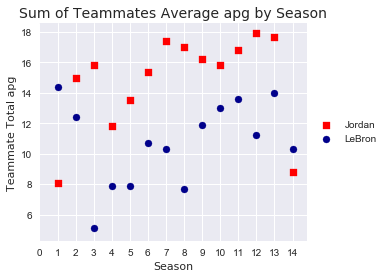

In [28]:
fig = plt.figure()
plot_area = fig.add_subplot(111)

plot_area.scatter(range(1,15), group_m_season.apg_season.sum(), marker="s", label='Jordan', color='red')
plot_area.scatter(range(1,15), group_l_season.apg_season.sum(), marker="o", label='LeBron', color='#00008b')

box = plot_area.get_position()
plot_area.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plot_area.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plot_area.set_title('Sum of Teammates Average apg by Season', **csfont, **titlefont)
plot_area.set_xlabel('Season', **csfont)
plot_area.set_ylabel('Teammate Total apg', **csfont)
plt.xticks(np.arange(0, 15, 1.0))


<h3>Conclusion</h3>

Thanks for checking the tutorial out and I hope it was a good intro for anyone new learning pandas.

If you have any questions feel free to comment in the gitlab repo!

